- Link to dataset: https://www.kaggle.com/iasonaskatechis/comic-books-current-values-and-other-data?select=comics_data.csv

In [1]:
!pip install yellowbrick

  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)
  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1


In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

from sklearn.cluster import KMeans
from io import open
from yellowbrick.cluster import KElbowVisualizer
from matplotlib import rcParams

pd.options.display.max_columns = 150
rcParams['figure.figsize'] = 7.5, 6

In [196]:
df = pd.read_csv("resources/comics_data.csv", sep=',')

In [197]:
df['cover_price'] = df['cover_price'].replace(r'^[$]','',regex=True)
df['issue'] = df['issue'].replace(r'^[# ]','',regex=True)
df['current_value'] = df['current_value'].replace(r'^[$]','',regex=True)

In [198]:
df["cover_date"] = df["cover_date"].str.rsplit(" '").str[-1]
df["characters"] = df["characters"].str.rsplit("'/").str[0]
df["characters"] = df["characters"].str.rsplit("[[").str[-1]

Removing unnecessary fields for this analysis

In [199]:
df.drop(df.columns[2:5], axis=1, inplace=True)

df.head(1)

,Unnamed: 0,title,issue,cover_date,cover_price,current_value,hist_prices_link,searched,owned,pages,rating,rating_count,ISBN-UPC,est_print_run,variant_of,preview,synopsis,contributors_names,contributors_roles,characters,pub_id,volume,years,issues_total,pub_name,pub_titles_total,pub_issues_total
0,0,'Mazing Man,1,86,0.75,3.00,/comic.php?a=historical&comic=54341?keepThis=t...,1259,181,32.00,0.00,0,NaN,NaN,NaN,NaN,1st appearance of 'Mazing Man,"['Stephen Destefano', 'Alan Gold', 'Nansi Hool...","['Pencils-CoverArt', 'Editor', 'Colors', 'Cove...","""'Mazing Man"",",1.00,NaN,1986,15.00,DC Comics,4688,57043


In [200]:
df.drop(df.columns[6], axis=1, inplace=True)

df.head(1)

,Unnamed: 0,title,issue,cover_date,cover_price,current_value,searched,owned,pages,rating,rating_count,ISBN-UPC,est_print_run,variant_of,preview,synopsis,contributors_names,contributors_roles,characters,pub_id,volume,years,issues_total,pub_name,pub_titles_total,pub_issues_total
0,0,'Mazing Man,1,86,0.75,3.00,1259,181,32.00,0.00,0,NaN,NaN,NaN,NaN,1st appearance of 'Mazing Man,"['Stephen Destefano', 'Alan Gold', 'Nansi Hool...","['Pencils-CoverArt', 'Editor', 'Colors', 'Cove...","""'Mazing Man"",",1.00,NaN,1986,15.00,DC Comics,4688,57043


In [201]:
df["searched"].value_counts()

23       3121
25       3115
22       3107
19       3073
21       3054
         ... 
7344        1
10082       1
16225       1
12043       1
5500        1
Name: searched, Length: 9263, dtype: int64

In [202]:
df["title"].value_counts()

Amazing Spider-Man                                           2455
March of Comics                                              1791
Batman                                                       1757
Detective Comics                                             1528
Vampirella                                                   1447
                                                             ... 
Wizard of Id: Daily & Sunday Strips                             1
The Terrible Revenance of Grandfather Bones                     1
Death Sin                                                       1
The History of Science Fiction: A Graphic Novel Adventure       1
Rohan at the Louvre                                             1
Name: title, Length: 58761, dtype: int64

Statistical analysis of data

In [203]:
pd.options.display.float_format = "{:.2f}".format

df.describe()

,Unnamed: 0,searched,owned,pages,rating,rating_count,pub_id,issues_total,pub_titles_total,pub_issues_total
count,461301.00,461301.00,461301.00,208011.00,461301.00,461301.00,461301.00,456401.00,461301.00,461301.00
mean,230650.00,472.51,54.49,53.80,0.38,0.14,1389.15,105.15,2039.69,20774.51
std,133166.27,1832.64,157.03,195.46,1.22,0.58,1766.45,215.98,2620.83,25262.64
min,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00
25%,115325.00,46.00,1.00,32.00,0.00,0.00,2.00,8.00,91.00,811.00
50%,230650.00,119.00,6.00,32.00,0.00,0.00,559.00,28.00,517.00,6574.00
75%,345975.00,343.00,33.00,36.00,0.00,0.00,2960.00,99.00,4688.00,57043.00
max,461300.00,224080.00,6478.00,75960.00,5.00,15.00,8253.00,1801.00,7285.00,65535.00


In [204]:
df['pages'].value_counts()

32.00      115540
36.00       18757
28.00        8952
52.00        6664
48.00        6571
            ...  
1952.00         1
410.00          1
1.50            1
305.00          1
706.00          1
Name: pages, Length: 590, dtype: int64

How many missing data points do we have?

In [205]:
missing_values = df.isnull().sum()
missing_values, df.shape

(Unnamed: 0                 0
 title                      0
 issue                      0
 cover_date             91589
 cover_price                0
 current_value              0
 searched                   0
 owned                      0
 pages                 253290
 rating                     0
 rating_count               0
 ISBN-UPC              263389
 est_print_run         430855
 variant_of            329844
 preview               445738
 synopsis              170111
 contributors_names         0
 contributors_roles         0
 characters                 0
 pub_id                     0
 volume                250753
 years                   1848
 issues_total            4900
 pub_name                   0
 pub_titles_total           0
 pub_issues_total           0
 dtype: int64,
 (461301, 26))

In [231]:
total_missing = missing_values.sum()
total_cells = np.product(df.shape)

percent_missing = (total_missing/total_cells) * 100
print(f"{percent_missing}% missing.")

18.69559388305283% missing.


removing lines with pages with no value

In [232]:
df_2 = df.dropna(axis=1)

In [233]:
df_2.describe()

,Unnamed: 0,searched,owned,rating,rating_count,pub_id,pub_titles_total,pub_issues_total
count,461301.00,461301.00,461301.00,461301.00,461301.00,461301.00,461301.00,461301.00
mean,230650.00,472.51,54.49,0.38,0.14,1389.15,2039.69,20774.51
std,133166.27,1832.64,157.03,1.22,0.58,1766.45,2620.83,25262.64
min,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00
25%,115325.00,46.00,1.00,0.00,0.00,2.00,91.00,811.00
50%,230650.00,119.00,6.00,0.00,0.00,559.00,517.00,6574.00
75%,345975.00,343.00,33.00,0.00,0.00,2960.00,4688.00,57043.00
max,461300.00,224080.00,6478.00,5.00,15.00,8253.00,7285.00,65535.00


In [234]:
df_2.columns, df_2.dtypes

(Index(['Unnamed: 0', 'title', 'issue', 'cover_price', 'current_value',
        'searched', 'owned', 'rating', 'rating_count', 'contributors_names',
        'contributors_roles', 'characters', 'pub_id', 'pub_name',
        'pub_titles_total', 'pub_issues_total'],
       dtype='object'),
 Unnamed: 0              int64
 title                  object
 issue                  object
 cover_price            object
 current_value          object
 searched                int64
 owned                   int64
 rating                float64
 rating_count            int64
 contributors_names     object
 contributors_roles     object
 characters             object
 pub_id                float64
 pub_name               object
 pub_titles_total        int64
 pub_issues_total        int64
 dtype: object)

In [236]:

df_2 = df_2[[
    'title', 'issue', 'cover_price', 'current_value',
        'searched', 'owned', 'rating', 'rating_count', 'contributors_names',
        'contributors_roles', 'characters', 'pub_id', 'pub_name',
        'pub_titles_total', 'pub_issues_total'
]]

In [237]:
df_2['cover_date'] = pd.to_numeric(df.cover_date, errors='coerce').fillna(0).astype(np.int64)
df_2['cover_price'] = pd.to_numeric(df.cover_price, errors='coerce').fillna(0).astype(np.float64)
df_2['current_value'] = pd.to_numeric(df.current_value, errors='coerce').fillna(0).astype(np.float64)

In [238]:
df_2.dtypes

title                  object
issue                  object
cover_price           float64
current_value         float64
searched                int64
owned                   int64
rating                float64
rating_count            int64
contributors_names     object
contributors_roles     object
characters             object
pub_id                float64
pub_name               object
pub_titles_total        int64
pub_issues_total        int64
cover_date              int64
dtype: object

In [239]:
from sklearn.preprocessing import LabelEncoder

In [240]:
le = LabelEncoder()

In [245]:
df_2['title'] = le.fit_transform(df_2['title'].values)
df_2['issue'] = le.fit_transform(df_2['issue'].values)
df_2['pub_name'] = le.fit_transform(df_2['pub_name'].values)
df_2['contributors_names'] = le.fit_transform(df_2['contributors_names'].values)
df_2['contributors_roles'] = le.fit_transform(df_2['contributors_roles'].values)
df_2['characters'] = le.fit_transform(df_2['characters'].values)

In [246]:
df_2.head()

,title,issue,cover_price,current_value,searched,owned,rating,rating_count,contributors_names,contributors_roles,characters,pub_id,pub_name,pub_titles_total,pub_issues_total,cover_date
0,12,329,0.75,3.00,1259,181,0.00,0,102753,56440,3,1.00,1518,4688,57043,86
1,12,671,0.75,3.00,182,70,0.00,0,115116,81946,8819,1.00,1518,4688,57043,86
2,12,1541,0.75,3.00,190,65,0.00,0,115116,81946,8819,1.00,1518,4688,57043,86
3,12,1983,0.75,4.00,670,96,0.00,0,24823,37505,3,1.00,1518,4688,57043,86
4,12,9088,0.75,3.00,413,118,0.00,0,115116,81946,8819,1.00,1518,4688,57043,86


In [254]:
df_2.shape

(461301, 16)

In [250]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))

In [255]:
sample = df_2.sample(n=461301, random_state=1)

Testing

In [257]:
visualizer.fit(sample)
visualizer.poof()

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

clustering

In [258]:
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_2)

In [259]:
predict = k_fit.labels_
df_2['Clusters'] = predict

In [260]:
df_2.head()

,title,issue,cover_price,current_value,searched,owned,rating,rating_count,contributors_names,contributors_roles,characters,pub_id,pub_name,pub_titles_total,pub_issues_total,cover_date,Clusters
0,12,329,0.75,3.00,1259,181,0.00,0,102753,56440,3,1.00,1518,4688,57043,86,4
1,12,671,0.75,3.00,182,70,0.00,0,115116,81946,8819,1.00,1518,4688,57043,86,4
2,12,1541,0.75,3.00,190,65,0.00,0,115116,81946,8819,1.00,1518,4688,57043,86,4
3,12,1983,0.75,4.00,670,96,0.00,0,24823,37505,3,1.00,1518,4688,57043,86,3
4,12,9088,0.75,3.00,413,118,0.00,0,115116,81946,8819,1.00,1518,4688,57043,86,4


Amount of data in each cluster

In [265]:
clusters_counts = df_2['Clusters'].value_counts()

In [272]:
df_2.groupby('Clusters').mean()

,title,issue,cover_price,current_value,searched,owned,rating,rating_count,contributors_names,contributors_roles,characters,pub_id,pub_name,pub_titles_total,pub_issues_total,cover_date
Clusters,,,,,,,,,,,,,,,,
0,29580.15,9908.97,4.74,32.02,118.59,8.03,0.04,0.02,113852.34,81136.36,8727.83,2033.69,2731.30,434.21,4757.79,90.14
1,30199.90,9886.58,4.25,33.99,333.32,31.52,0.20,0.06,28106.48,55904.30,8177.93,1671.25,2608.65,798.83,8331.85,55.45
2,30385.75,10021.35,3.87,29.41,338.79,36.69,0.24,0.07,82078.61,44888.01,8093.82,1638.79,2621.79,849.71,8721.22,50.54
3,27826.92,10160.51,3.83,20.26,1465.80,190.94,1.44,0.57,36349.84,40167.70,4953.22,1.86,2656.64,6183.05,61900.63,45.05
4,29395.03,10282.55,5.09,42.78,971.69,119.84,0.81,0.30,102869.12,62030.62,6649.80,1.54,2576.66,6082.18,61601.87,60.10


In [274]:
X = df_2['Clusters'].unique()

<AxesSubplot:ylabel='Clusters'>

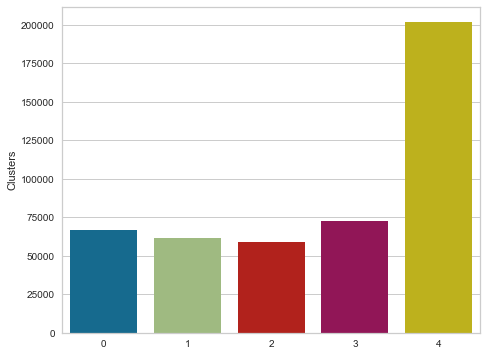

In [276]:
sns.barplot(x=X, y=clusters_counts, data=df_2)
#plt.bar(clusters_counts, df_2['Clusters'])